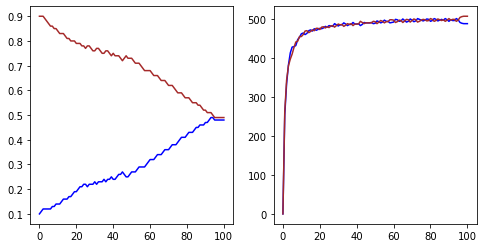

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# change os.chdir if necessary
# this is where elections_data.csv will be saved

def plotdata(data):
    
    plt.figure(1, figsize = (8, 4))

    x = range(0, T + 1)
    
    plt.subplot(121)
    plt.plot(x, data[:, 0], label = "Left policy", color = "blue")
    plt.plot(x, data[:, 1], label = "Right policy", color = "brown")
    
    plt.subplot(122)
    plt.plot(x, data[:, 2], label = "Left votes", color = "blue")
    plt.plot(x, data[:, 3], label = "Right votes", color = "brown") 

class voter:
    
    def __init__(self):
        
        self.ideal = random.uniform(0, 1)
        
        self.vote_choice = -1 # 
        # -1 is no note, 0 vote left, 1 vote right
        
        self.interest = random.uniform(0, 1)
        # 0 - no interest, 1 - most interest
        
    def vote(self, left, right):
        # left and right are policies of candidates
        # from 0 - 1 interval
        
        if np.random.binomial(1, self.interest, 1):
            if abs(self.ideal - left) < abs(self.ideal - right):
                self.vote_choice = 0
            elif abs(self.ideal - left) > abs(self.ideal - right):
                self.vote_choice = 1
            else:
                self.vote_choice = random.randint(0, 1)

class candidate:
    
    def __init__(self, ideal_point):
        
        self.ideal = ideal_point
        self.policy = ideal_point
        # policy may be different from ideal
        # e.g., if candidates want to win
        
    def adapt(self, lvotes, rvotes):
        if abs(self.ideal - 0) < abs(self.ideal - 1):
            if lvotes < rvotes:
                self.policy += 0.01
        if (self.ideal - 0) > abs(self.ideal - 1):
            if rvotes < lvotes:
                self.policy -= 0.01
        if lvotes == rvotes:
            self.policy += np.random.choice([-0.01, 0.01])

N = 1001

V = [voter() for i in range(N)]

LC = candidate(0.1)
RC = candidate(0.9)

T = 100 # days during the electoral campaign

# 0 - LC.policy, 1 - RC.policy, 2 - Lvotes, 3 - Rvotes
data = np.zeros((T+1, 4))

data[0, 0] = LC.policy
data[0, 1] = RC.policy

for t in range(T):

    votesL, votesR = 0, 0    
    
    for i in V:
        
        i.vote(LC.policy, RC.policy)
    
        # if i.vote_choice == 0:
        #     votesL += 1
        # if i.vote_choice == 1:
        #     votesR += 1
    
    # more efficient than using IF statements above
    votesL = sum([i.vote_choice == 0 for i in V])
    votesR = sum([i.vote_choice == 1 for i in V])
    
    LC.adapt(votesL, votesR)
    RC.adapt(votesL, votesR)
    
    LC.policy = np.clip(LC.policy, 0, RC.policy - 0.01)
    RC.policy = np.clip(RC.policy, LC.policy + 0.01, 1)
    
    # print(f"Day {t + 1}")
    # print(f"Left votes: {votesL}, Right votes {votesR}")
    
    data[t + 1, 0] = LC.policy
    data[t + 1, 1] = RC.policy
    data[t + 1, 2] = votesL
    data[t + 1, 3] = votesR
      
plotdata(data)      
df = pd.DataFrame(data)
df.columns = ["L policy", "R policy", "L votes", "R votes"]
df.to_csv("elections_data.csv")